import sys

In [1]:
import sys

sys.path.insert(1, "/home/vinicius/storage1/projects/IPP_WANG")

In [2]:
import numpy as np

import src.setParams

In [3]:
import src.plot_figures as plot_figures
import src.meanfield as meanfield


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: nest-3.0
 Built: Jan  4 2023 15:13:43

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



### Simulation parameters

In [4]:
lnt = 20

### Model parameters

In [5]:
# Time resolution
dt        = 0.2
# Simulation time
simtime   = 600.0
# Transient time
transient = 0.0

In [6]:
t, Rstrong = meanfield.simulate(lnt = lnt, simtime = simtime, dt = dt, tau = 30.0, transient = transient, Wee = 6.00, Wei = 6.70)
t, Rweak   = meanfield.simulate(lnt = lnt, simtime = simtime, dt = dt, tau = 20.0, transient = transient, Wee = 4.45, Wei = 4.70)


Apr 04 15:54:58 SimulationManager::set_status [Info]: 
    Temporal resolution changed.

Apr 04 15:54:58 NodeManager::prepare_nodes [Info]: 
    Preparing 22 nodes for simulation. 2 of them use iterative solution 
    techniques.

Apr 04 15:54:58 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 22
    Simulation time (ms): 600
    Number of OpenMP threads: 20
    Not using MPI

Apr 04 15:54:58 SimulationManager::run [Info]: 
    Simulation finished.

Apr 04 15:54:58 SimulationManager::set_status [Info]: 
    Temporal resolution changed.

Apr 04 15:54:58 NodeManager::prepare_nodes [Info]: 
    Preparing 22 nodes for simulation. 2 of them use iterative solution 
    techniques.

Apr 04 15:54:58 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 22
    Simulation time (ms): 600
    Number of OpenMP threads: 20
    Not using MPI

Apr 04 15:54:58 SimulationManager::run [Info]: 
    Simulation finished.


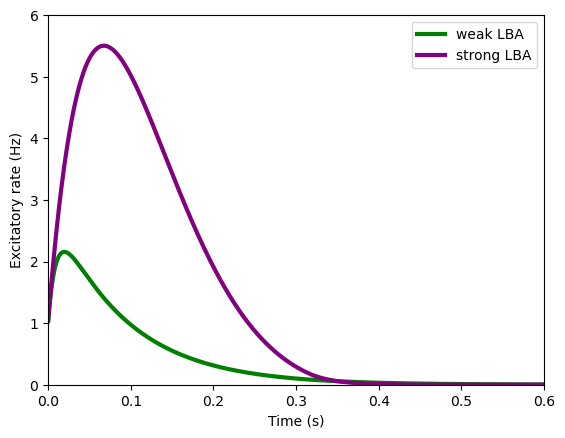

In [7]:
plot_figures.fig1b(t, Rweak, Rstrong)


Apr 04 15:54:58 SimulationManager::set_status [Info]: 
    Temporal resolution changed.

Apr 04 15:54:58 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation. 2 of them use iterative solution 
    techniques.

Apr 04 15:54:58 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 600
    Number of OpenMP threads: 1
    Not using MPI

Apr 04 15:54:58 SimulationManager::run [Info]: 
    Simulation finished.

Apr 04 15:54:58 SimulationManager::set_status [Info]: 
    Temporal resolution changed.

Apr 04 15:54:58 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation. 2 of them use iterative solution 
    techniques.

Apr 04 15:54:58 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 600
    Number of OpenMP threads: 1
    Not using MPI

Apr 04 15:54:58 SimulationManager::run [Info]: 
    Simulation finished.

Apr 04 15:54:58 SimulationManager::set_status [Info

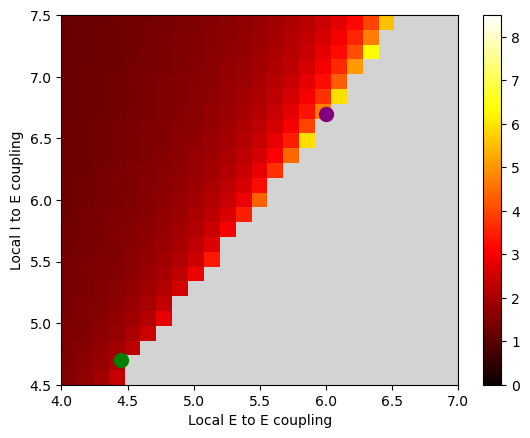

In [8]:
Wee = np.linspace(4, 7, 25)     # Coupling E -> E
Wei = np.linspace(4.5, 7.5, 25) # Coupling I -> E
Fmax = np.zeros([Wee.shape[0], Wei.shape[0]])

for i in range(Wee.shape[0]):
    for j in range(Wei.shape[0]):
        wee = Wee[i]
        wei = Wei[j]
        t, R = meanfield.simulate(simtime = simtime, dt = dt, transient = transient, Wee = Wee[i], Wei = Wei[j])
        Fmax[j,i] = R.max()

plot_figures.fig1c(Fmax, [Wee.min(), Wee.max(), Wei.min(), Wei.max()])